# ABC-анализ

ABC-анализ — метод, позволяющий классифицировать ресурсы фирмы по степени их важности. Этот анализ является одним из методов рационализации и может применяться в сфере деятельности любого предприятия. В его основе лежит принцип Парето — 20 % всех товаров дают 80 % оборота. По отношению к ABC-анализу правило Парето может прозвучать так: надёжный контроль 20 % позиций позволяет на 80 % контролировать систему, будь то запасы сырья и комплектующих, либо продуктовый ряд предприятия и т. п. Часто ABC-анализ путают с ABC-методом, расшифровывая ABC как Activity Based Costing, что в корне неверно.

ABC-анализ — анализ товарных запасов путём деления на три категории:

- А — наиболее ценные, 20 % — ассортимента (номенклатура); 80 % — продаж
- В — промежуточные, 30 % — ассортимента; 15 % — продаж
- С — наименее ценные, 50 % — ассортимента; 5 % — продаж

В зависимости от целей анализа может быть выделено произвольное количество групп. Чаще всего выделяют 3, реже 4-5 групп.

По сути, ABC-анализ — это ранжирование ассортимента по разным параметрам. Ранжировать таким образом можно и поставщиков, и складские запасы, и покупателей, и длительные периоды продаж — всё, что имеет достаточное количество статистических данных. Результатом АВС анализа является группировка объектов по степени влияния на общий результат.

АВС-анализ основывается на принципе дисбаланса, при проведении которого строится график зависимости совокупного эффекта от количества элементов. Такой график называется кривой Парето, кривой Лоренца или ABC-кривой. По результатам анализа ассортиментные позиции ранжируются и группируются в зависимости от размера их вклада в совокупный эффект. В логистике ABC-анализ обычно применяют с целью отслеживания объёмов отгрузки определённых артикулов и частоты обращений к той или иной позиции ассортимента, а также для ранжирования клиентов по количеству или объёму сделанных ими заказов.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Пример кривой Парето

In [8]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.bar(x, y, alpha=0.5)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), xytext=(-8,8), textcoords='offset points', fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

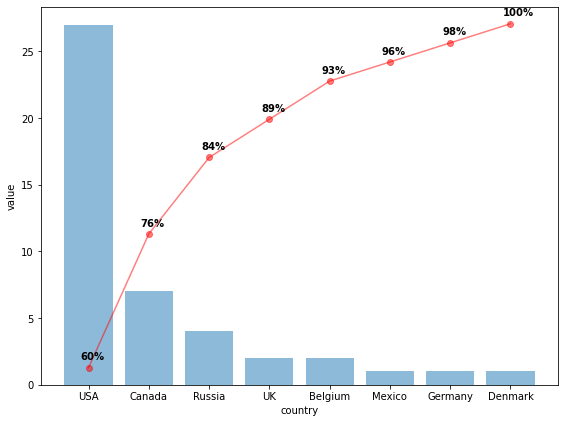

In [9]:
df = pd.DataFrame({'value': [27.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0],
                  'country':['USA', 'Canada', 'Russia', 'UK', 'Belgium',
                             'Mexico', 'Germany', 'Denmark']})

pareto_plot(df, x='country', y='value')